In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#Obtain Data

data_full = pd.read_csv('/Users/aminasaleh/Downloads/water_potability.csv')

In [3]:
#Clean Up

data_full = data_full.dropna()

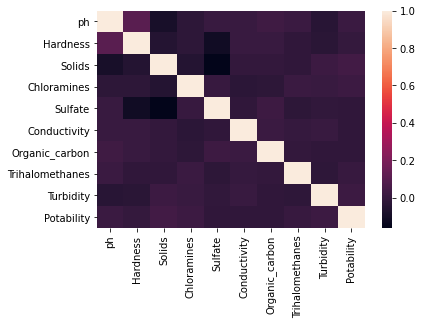

In [4]:
#Correlation Matrix

waterpot_hm = sns.heatmap(data_full.corr(), annot = False)

In [5]:
#Create Training and Test Set

x = data_full.drop(columns = ['Potability']).copy()
y = data_full ['Potability']
scaler = MinMaxScaler()
X = scaler.fit_transform(data_full)
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)

In [6]:
#Build the Model

classifier = svm.SVC(kernel = 'linear')

In [7]:
#Fit the Model

classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [8]:
#Train the Model

y_predicted_train = classifier.predict(x_train)
y_predicted_test = classifier.predict(x_test)

[[229   2]
 [168   4]]
              precision    recall  f1-score   support

           0       0.58      0.99      0.73       231
           1       0.67      0.02      0.04       172

    accuracy                           0.58       403
   macro avg       0.62      0.51      0.39       403
weighted avg       0.62      0.58      0.44       403



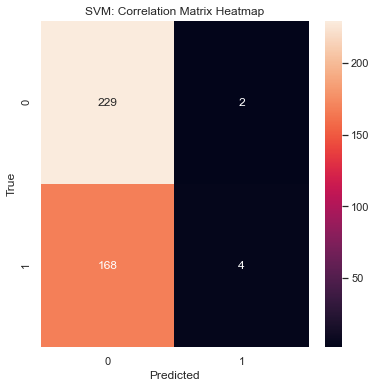

In [11]:
#Create Confusion Matrix

conf_mat = confusion_matrix(y_test, y_predicted_test)
heatmap = sns.heatmap(conf_mat, annot=True, fmt='.0f')

sns.set(font_scale=1.2)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set(rc={'figure.figsize':(6,6)})
sns.set_palette("pastel")
plt.title('SVM: Correlation Matrix Heatmap')

heatmap.set_xlabel('Predicted')
heatmap.set_ylabel('True')

print(metrics.confusion_matrix(y_test, y_predicted_test))
print(metrics.classification_report(y_test, y_predicted_test))

In [12]:
#Determine Accuracy 

print("Accuracy:",metrics.accuracy_score(y_train, y_predicted_train))
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_test))

Accuracy: 0.6032338308457711
Accuracy: 0.5781637717121588
